<a href="https://colab.research.google.com/github/eilinlunam/Fisicoquimica-Computacional/blob/master/quantum_dots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejecutar siguiente celda oculta.

In [0]:
# Clase que genera un punto cuantico triangular o hexagonal de tamano n.

import os
import numpy as np
from math import sqrt
from matplotlib import pylab
from google.colab import files
import matplotlib.pyplot as plt
from google.colab import widgets
from mpl_toolkits import mplot3d

class punto_cuantico():
    def __init__(self, forma, n, d=0.0, ang=0.0, addH=False, 
                 acc=1.44, CH=1.41, 
                 calcular_parametros=True):
        self.n = n # Tamano punto cuantico.
        self.form = forma
        self.acc = acc # Distancia entre carbonos: C-C
        self.CH = CH # Distancia entre C-H.
        self.d = d # Valor en eje Z
        self.ang = ang # Angulo de rotacion
        self.addH = addH # Booleano que agrega coordenadas de Hidrogenos
        self.atomos = None # Vector de atomos: 1='C', 0='H'
        self.coords = None # Matriz de Coordenadas [[x],[y],[z]]
        self.coordsC = None # Matriz de Coordenadas de Carbonos
        self.coordsH = None # Matriz de Coordenadas de Hidrogenos
        self.N = None # Cantidad de Carbonos + Hidrogenos
        self.nC = None # Cantidad de Carbonos
        self.nH = None # Cantidad de Hidrogenos
        self.x, self.y, self.z = None, None, None # Coords x,y,z, C+H.
        self.Cx, self.Cy, self.Cz = None, None, None # Coords x,y,z, C.
        self.Hx, self.Hy, self.Hz = None, None, None # Coords x,y,z, H.
        if calcular_parametros:
          if self.form == "Triangular":
            self.Triangular()
          else:
            self.Hexagonal()
 
    # Generando coordenadas de un punto cuantico triangular de tamano n.
    def Triangular(self):
        t = (0.75*self.n-0.25)*self.acc  
        self.x, self.y  = [0], [t+self.acc/2] 
        for k in range(self.n):
            i = k+1
            j = t + k*-1.5*self.acc
            X = np.linspace(-i*sqrt(3)*self.acc/2, i*sqrt(3)*self.acc/2, i+1)
            Y = np.ones(i+1)*j
            self.x += list(X)*2
            self.y += list(Y)+list(Y-self.acc)
        self.x += list(X+sqrt(3)/2*self.acc)
        self.y += list(Y-1.5*self.acc)
        self.z = list(np.ones(len(self.x))*self.d)
        self.x.pop(-1)
        self.y.pop(-1)
        self.z.pop(-1)
        return self.ParametrosC()
 
    # Generando las coordenadas de un punto cuantico hexagonal de tamano n.
    def Hexagonal(self):
        t = (1.5*self.n-1)*self.acc 
        self.x, self.y = [], []
        I = (list(np.arange(self.n,self.n*2-1))+
             list(np.arange(self.n*2-1,self.n-1,-1)))
        for k in range(self.n*2-1):
            i=I[k]
            j = t + k*-1.5*self.acc    
            X = np.arange(-i*sqrt(3)*self.acc/2,
                          i*sqrt(3)*self.acc/2+1, sqrt(3)*self.acc)
            Y= np.ones(i+1)*j
            self.x += list(X)+list(X)
            self.y += list(Y)+list(Y-self.acc)
        xx = list(np.arange(-(self.n-1)*sqrt(3)*self.acc/2, 
                             (self.n-1)*sqrt(3)*self.acc/2+1,
                              sqrt(3)*self.acc))
        self.x += xx*2
        self.y += ( list(np.ones(self.n)*max(self.y)+0.5*self.acc)
                   +list(np.ones(self.n)*min(self.y)-0.5*self.acc))
        self.z = list(np.ones(len(self.x))*self.d)
        return self.ParametrosC(True)
      
    # Guardando informacion de los Carbonos.
    def ParametrosC(self, Hex=False):
        self.atomos = list(np.ones(len(self.x)))
        self.coordsC = [self.x,self.y,self.z]
        self.nC = len(self.x)
        if self.ang != 0.:
            self.x, self.y = self.rotacion(self.x,self.y)
        self.Cx, self.Cy, self.Cz = self.x.copy(),self.y.copy(),self.z.copy()
        if self.addH == True:
            if Hex==False:
                return self.addHidrogenosTri()
            else:
                return self.addHidrogenosHex()
        self.N = self.nC
        self.coords = [self.x,self.y,self.z]
        return self
      
    # Agregando hidrogenos a coordenadas triangulares.
    def addHidrogenosTri(self):
        t=(0.75*self.n-0.25)*self.acc
        self.Hx, self.Hy  = [0], [t+self.acc/2+self.CH]
        for k in range(self.n):
            self.Hx += [-sqrt(3)/2*((k+1)*self.acc+self.CH),
                         sqrt(3)/2*((k+1)*self.acc+self.CH)]
            self.Hy += [t+k*-1.5*self.acc+self.CH/2]*2
        self.Hx += (list(np.linspace(-(self.n-1)*sqrt(3)*self.acc/2,
                                      (self.n-1)*sqrt(3)*self.acc/2, self.n))
                    +[self.Hx[self.n*2]] + [self.Hx[self.n*2-1]])
        self.Hy += (list(t+(self.n-1)*-1.5*self.acc*np.ones(self.n)
                         -1.5*self.acc-self.CH)
                    +[self.Hy[self.n*2]-self.acc-self.CH] 
                    +[self.Hy[self.n*2]-self.acc-self.CH])
        self.Hz = list(np.ones(len(self.Hx))*self.d)
        return self.ParametrosH()
      
    # Agregando hidrogenos a coordenadas hexagonales.
    def addHidrogenosHex(self):
        t = (1.5*self.n-1.)*self.acc
        self.Hx, self.Hy = [], []
        I = list(np.arange(self.n,self.n*2))
        for k in range(self.n):
            i=I[k]
            j = t + k*-1.5*self.acc
            self.Hx += [-i*sqrt(3)*self.acc/2-sqrt(3)/2*self.CH,
                    i*sqrt(3)*self.acc/2+sqrt(3)/2*self.CH]
            self.Hy += [j+self.CH/2, j+self.CH/2]
        self.Hx += list(np.arange(-(self.n-1)*sqrt(3)*self.acc/2,
                              (self.n-1)*sqrt(3)*self.acc/2+1, 
                               sqrt(3)*self.acc)) 
        self.Hy += list(np.ones(self.n)*t+self.acc/2+self.CH)
        self.Hx += self.Hx
        self.Hy += list(np.array(self.Hy)*-1)
        self.Hz = list(np.ones(len(self.Hx))*self.d)
        return self.ParametrosH()
        
    # Guardando informacion de los Hidrogenos
    def ParametrosH(self):
        if self.ang!=0.:
            self.Hx, self.Hy = self.rotacion(self.Hx,self.Hy)
        self.atomos += list(np.zeros(len(self.Hx)))
        self.x += self.Hx
        self.y += self.Hy
        self.z += self.Hz
        self.coords = [self.x, self.y, self.z]
        self.coordsH = [self.Hx,self.Hy,self.Hz]
        self.nH = len(self.Hx)
        self.Hx, self.Hy
        self.N = self.nC+self.nH
        return self

    # Rotando coordenadas x y y alrededor del punto(0,0)
    def rotacion(self, x,y):
        A = [[np.cos(self.ang), -np.sin(self.ang)],
             [np.sin(self.ang), np.cos(self.ang)]]
        r = [x,y]
        x, y = np.dot(A,r)
        return list(x), list(y)
    
    # Graficando punto cuantico
    def graph(self):
        pylab.title("n="+str(qd.n))
        pylab.plot(self.Cx,self.Cy,'r.')
        if self.addH==True:
            pylab.plot(self.Hx,self.Hy,'y.')
        
    # Escribiendo coordenadas
    def write_coords(self, filename):
      f = open(filename, "w")
      f.write(str(self.N)+"\n")
      f.write("XYZ"+"\n")
      for i in range(self.N):
          if self.atomos[i]==1: a="C"
          else: a="H"
          f.write( a+"\t"
                    +str(self.x[i])+"\t"
                    +str(self.y[i])+"\t"
                    +str(self.z[i])+"\n")
      f.close()
      return 

# <font color='red'> QUANTUM DOTS </font> 

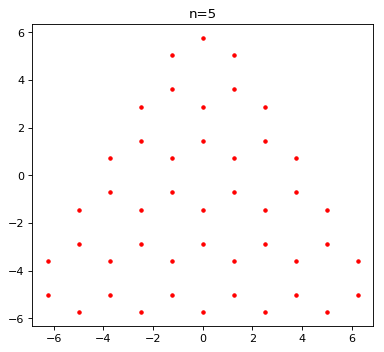

In [2]:
#@title ##  <font color='blue'> Generating a quantum dot. </font> {run: "auto"}

Form = 'Triangular' #@param ["Triangular", "Hexagonal"]
n_points = 5 #@param {type:"slider", min:1, max:50, step:1}
add_Hydrogens = False #@param ["False", "True"] {type:"raw"}
angle = 0 #@param {type:"slider", min:0, max:360, step:5}
coord_z = 0 #@param {type:"slider", min:0, max:100, step:1}
#@markdown ---
#@markdown  <font color='blue'> **Options:** </font>
#@markdown ---
Plot = True #@param {type:"boolean"}
Save_file_xyz = False #@param {type:"boolean"}
file_name = "file.xyz" #@param {type:"string"}
#@markdown ---

qd = punto_cuantico(Form, n_points, d=coord_z, 
                    ang=angle, addH=add_Hydrogens)

if Plot:
  plt.figure(figsize=(5.5,5), dpi=80)
  qd.graph()
  
if Save_file_xyz:
  qd.write_coords(file_name)
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

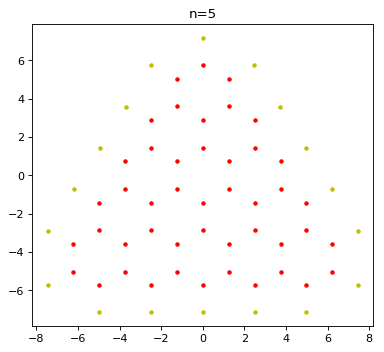

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

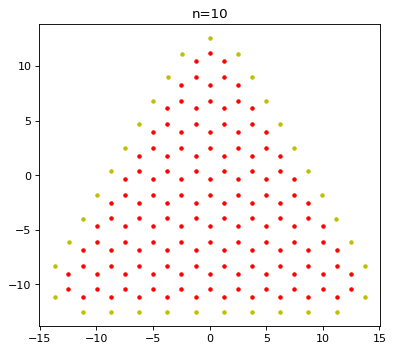

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

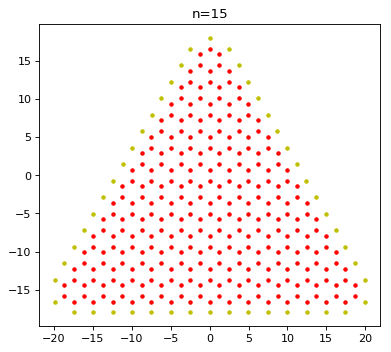

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

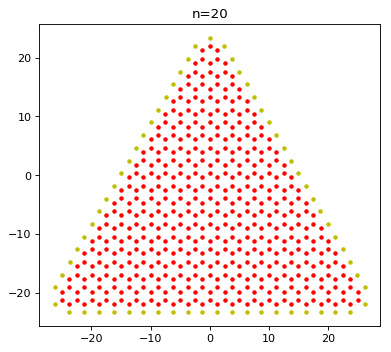

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

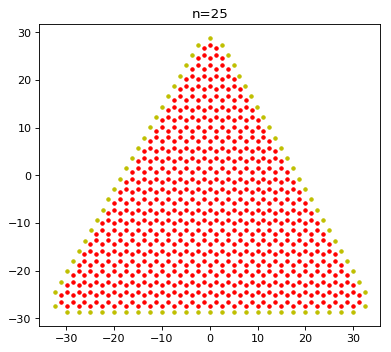

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

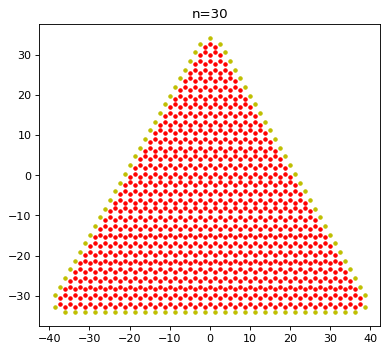

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

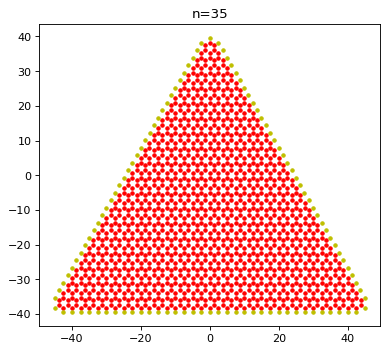

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

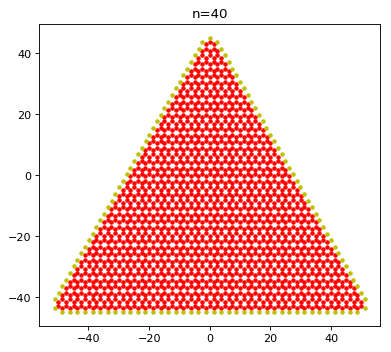

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

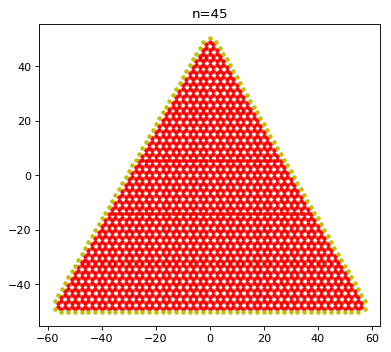

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

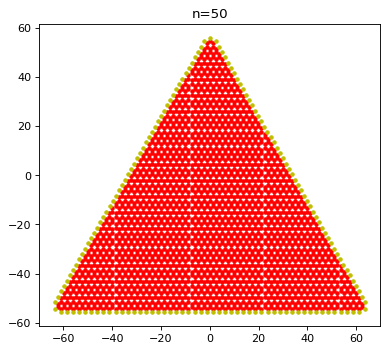

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

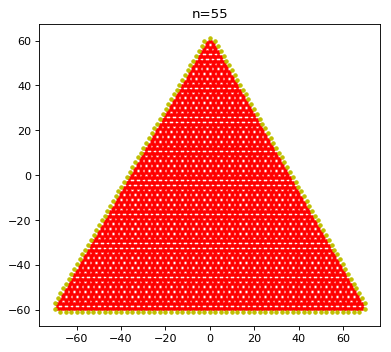

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

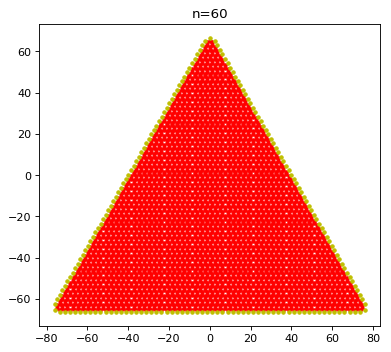

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

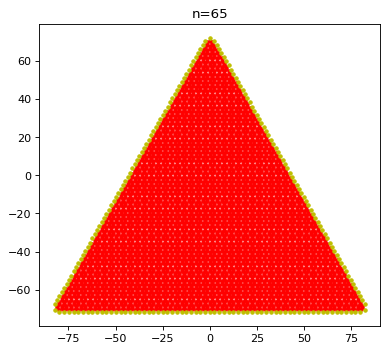

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

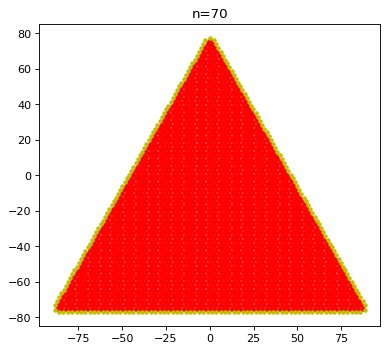

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

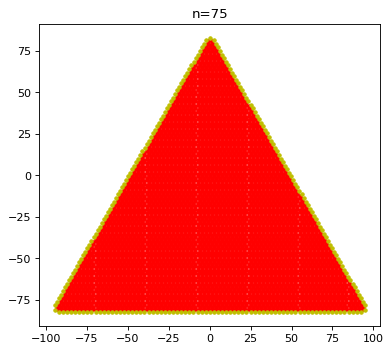

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

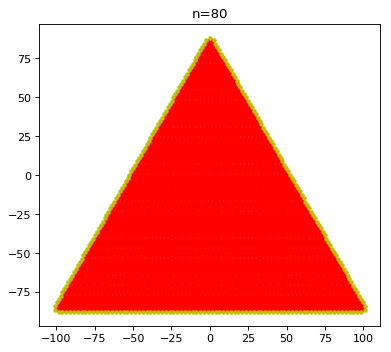

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

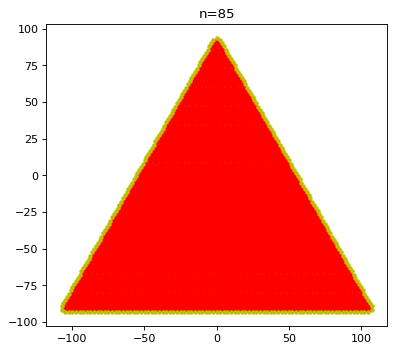

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

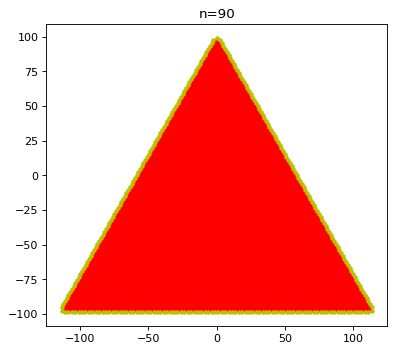

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

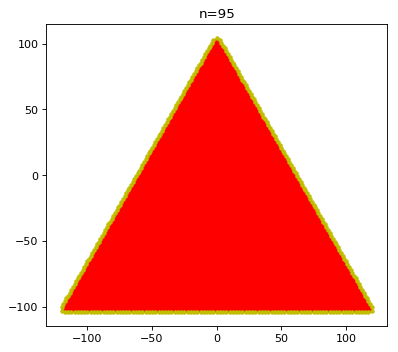

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

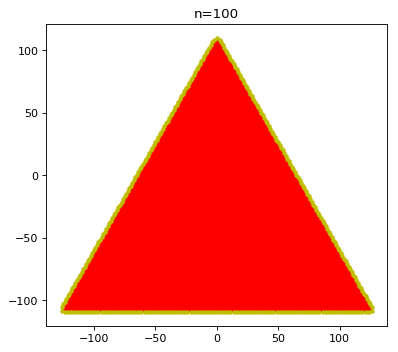

<IPython.core.display.Javascript object>

In [5]:
# @title ## <font color='blue'> Generating several quantum dots</font> {run:"auto"}
Form = 'Triangular' #@param ["Triangular", "Hexagonal"]
n_initial = 5 #@param {type:"integer"}
n_final = 100 #@param {type:"integer"}
step = 5 #@param {type:"integer"}
add_Hydrogens = True #@param ["False", "True"] {type:"raw"}
angle = 0 #@param {type:"slider", min:0, max:360, step:5}
coord_z = 0 #@param {type:"slider", min:0, max:100, step:1}
#@markdown ---
#@markdown <font color='blue'>**Options:**</font> 
#@markdown ---
Plot = True #@param {type:"boolean"}
Save_file_xyz = False #@param {type:"boolean"}
file_names = "file.xyz" #@param {type:"string"}
show_axis = True #@param {type:"boolean"}
#@markdown ---

x = range(n_initial, n_final+1, step)

if Plot:
  tb = widgets.TabBar([str(i) for i in x])
  for i in range(len(x)):
    qd = punto_cuantico(Form, x[i], d=coord_z, 
                      ang=angle, addH=add_Hydrogens) 
    with tb.output_to(i, select=(i < 1)):
      pylab.figure(figsize=(5.5,5), dpi=80)
      qd.graph()
      if show_axis == False:
        pylab.axis('off')
      pylab.show()

if Save_file_xyz:
  if os.path.isdir('coords/'):
    ! rm -rf coords
  if os.path.isfile('coords.zip'):
    ! rm coords.zip
  ! mkdir coords
  r = file_names.split('.')
  for i in range(len(x)):
    qd.write_coords('coords/'+r[0]+'-n'+str(x[i])+'.'+r[1]) 
  !zip -r coords.zip coords/
  files.download('coords.zip')